Problem 1.1

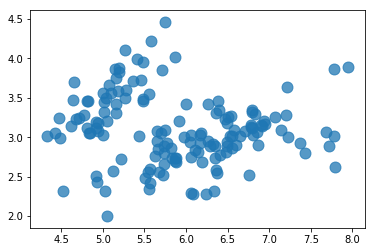

I think there are two clusters because there are two distinct groups in the scatter plot.


In [28]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.linalg import svd
import mltools.transforms

iris = np.genfromtxt("data/iris.txt", delimiter = None)
X = iris[:,0:2]

plt.scatter(X[:, 0], X[:, 1], s = 120, alpha = .75);
plt.show()

print"I think there are two clusters because there are two distinct groups in the scatter plot."

Problem 1.2

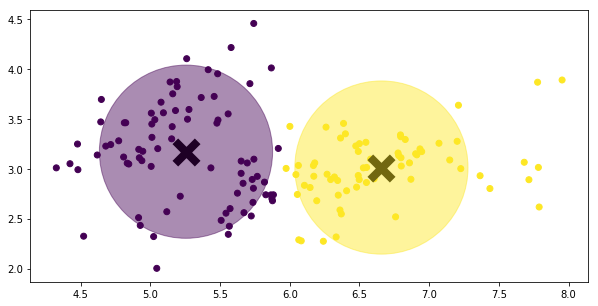

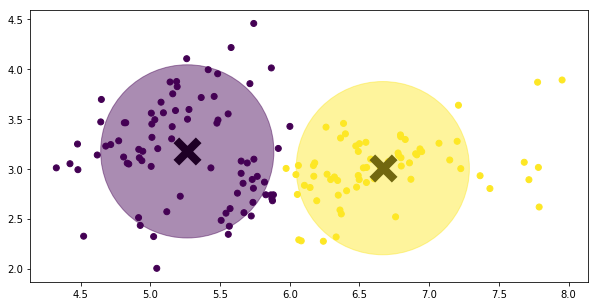

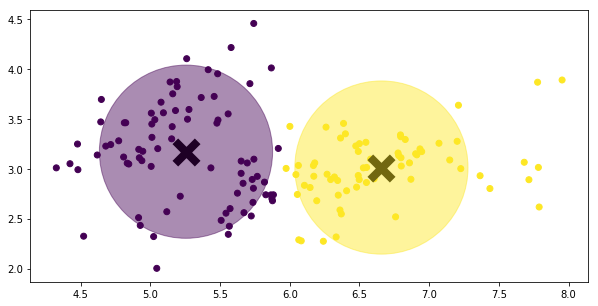

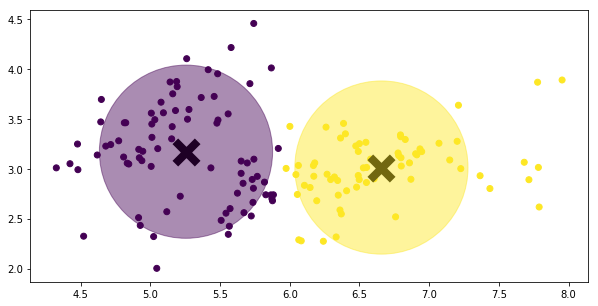

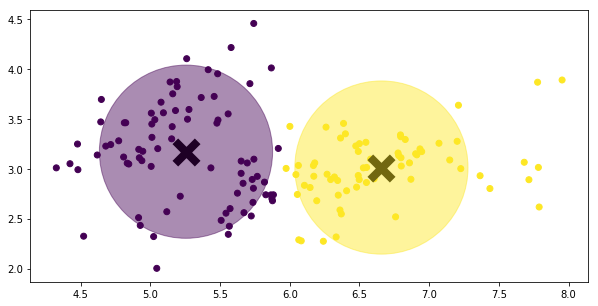

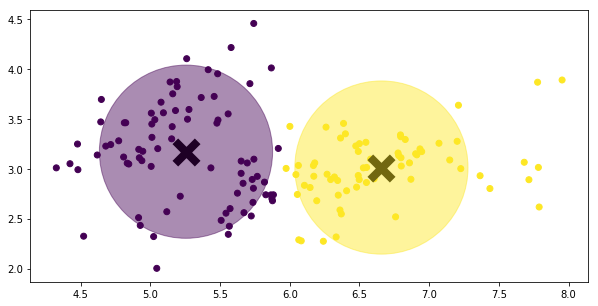

best score: 57.877648396983034


In [23]:
Z, mu, ssd = ml.cluster.kmeans(X, K=2, init='k++')
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X[:, 0], X[:, 1], c=Z)
ax.scatter(mu[:, 0], mu[:, 1], s=500, marker='x', facecolor='black', lw=8) 
ax.scatter(mu[:, 0], mu[:, 1], s=30000, alpha=.45, c=np.unique(Z))
plt.show()
best_score = ssd
for i in range(5):
    Z, mu, ssd = ml.cluster.kmeans(X, K=2, init='k++')
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    ax.scatter(X[:, 0], X[:, 1], c=Z)
    ax.scatter(mu[:, 0], mu[:, 1], s=500, marker='x', facecolor='black', lw=8) 
    ax.scatter(mu[:, 0], mu[:, 1], s=30000, alpha=.45, c=np.unique(Z))
    plt.show()
    if(ssd < best_score):
        best_score = ssd
        

print "best score:", best_score

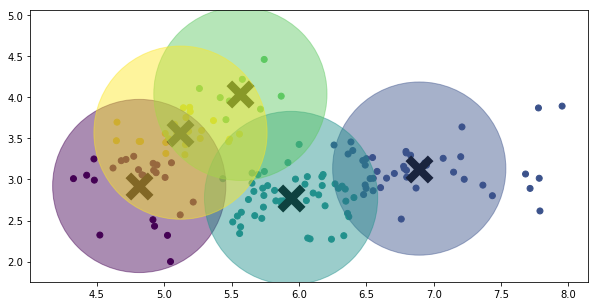

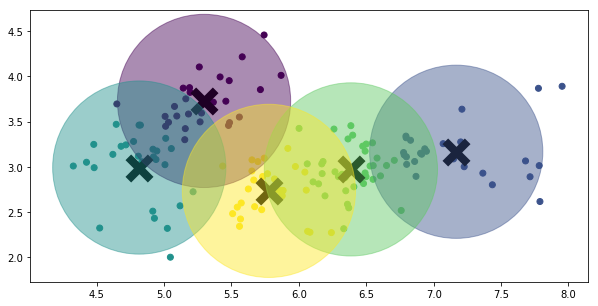

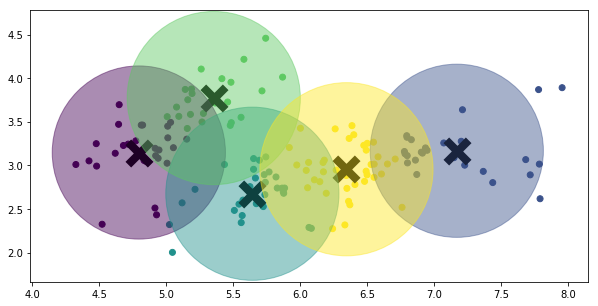

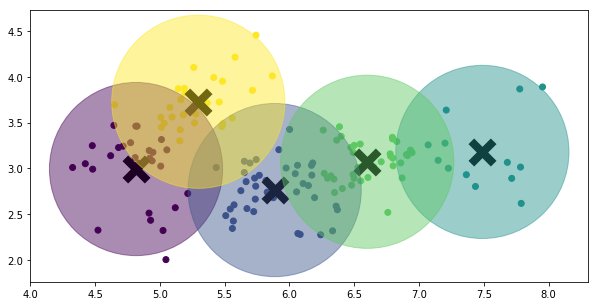

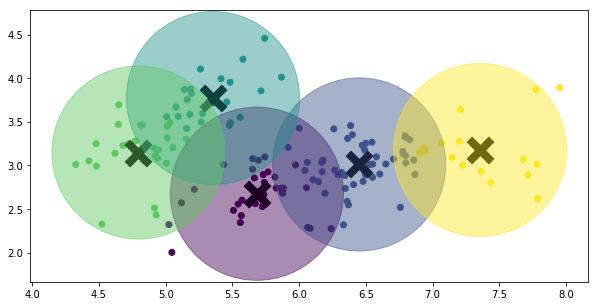

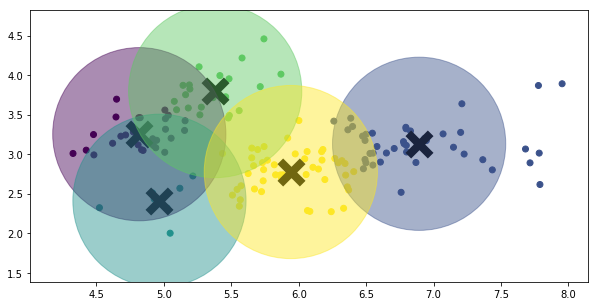

best score: 20.906080308386695


In [24]:
Z, mu, ssd = ml.cluster.kmeans(X, K=5, init='K++')
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X[:, 0], X[:, 1], c=Z)
ax.scatter(mu[:, 0], mu[:, 1], s=500, marker='x', facecolor='black', lw=8) 
ax.scatter(mu[:, 0], mu[:, 1], s=30000, alpha=.45, c=np.unique(Z))
plt.show()
best_score = ssd

for i in range(5):
    Z, mu, ssd = ml.cluster.kmeans(X, K=5, init='K++')
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    ax.scatter(X[:, 0], X[:, 1], c=Z)
    ax.scatter(mu[:, 0], mu[:, 1], s=500, marker='x', facecolor='black', lw=8) 
    ax.scatter(mu[:, 0], mu[:, 1], s=30000, alpha=.45, c=np.unique(Z))
    plt.show()
    if(ssd < best_score):
        best_score = ssd

print "best score:", best_score

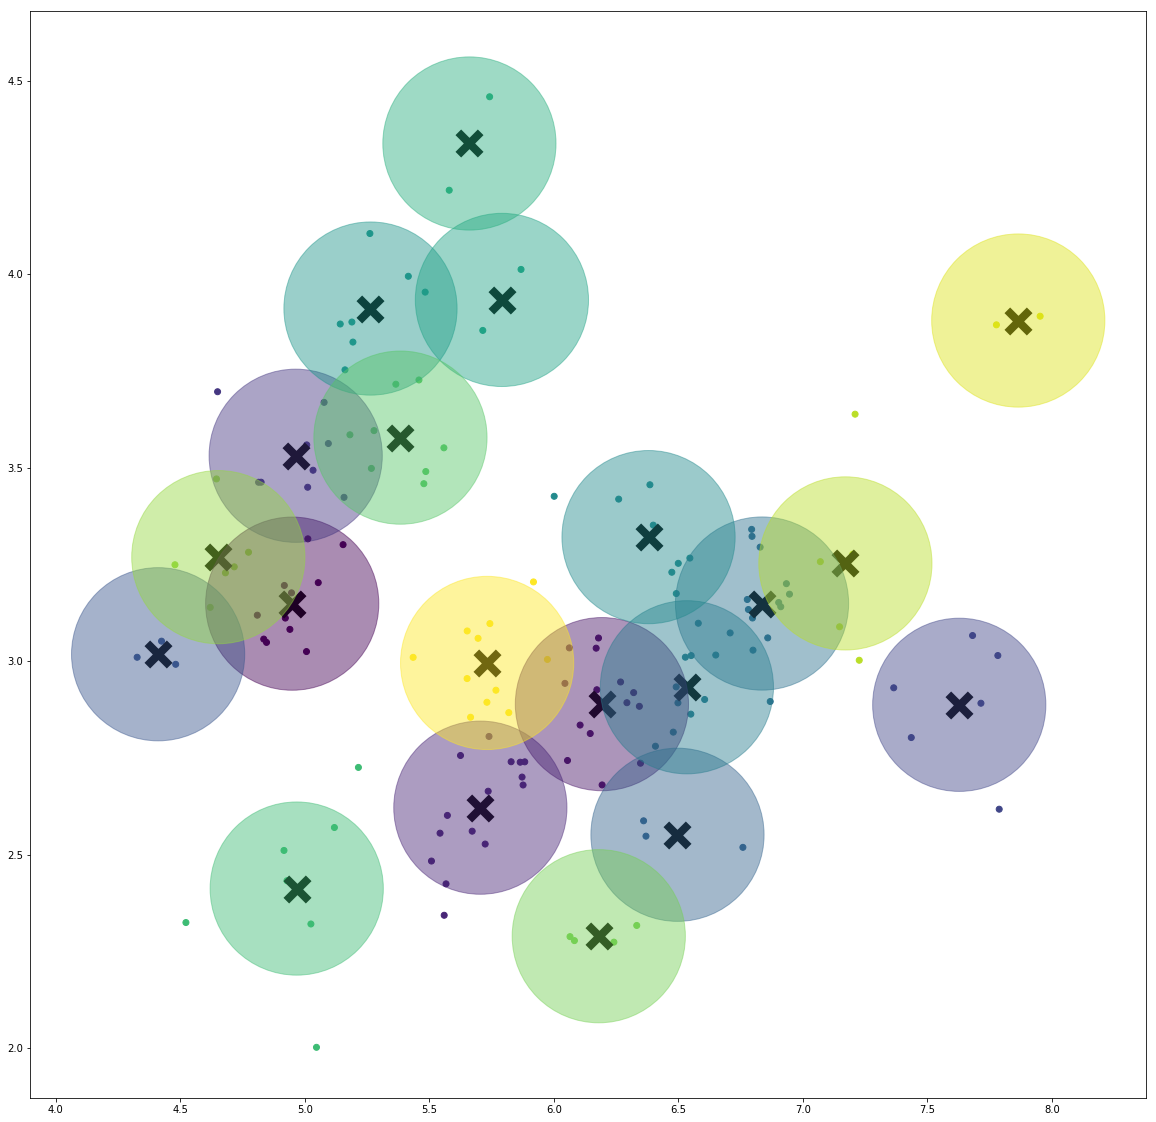

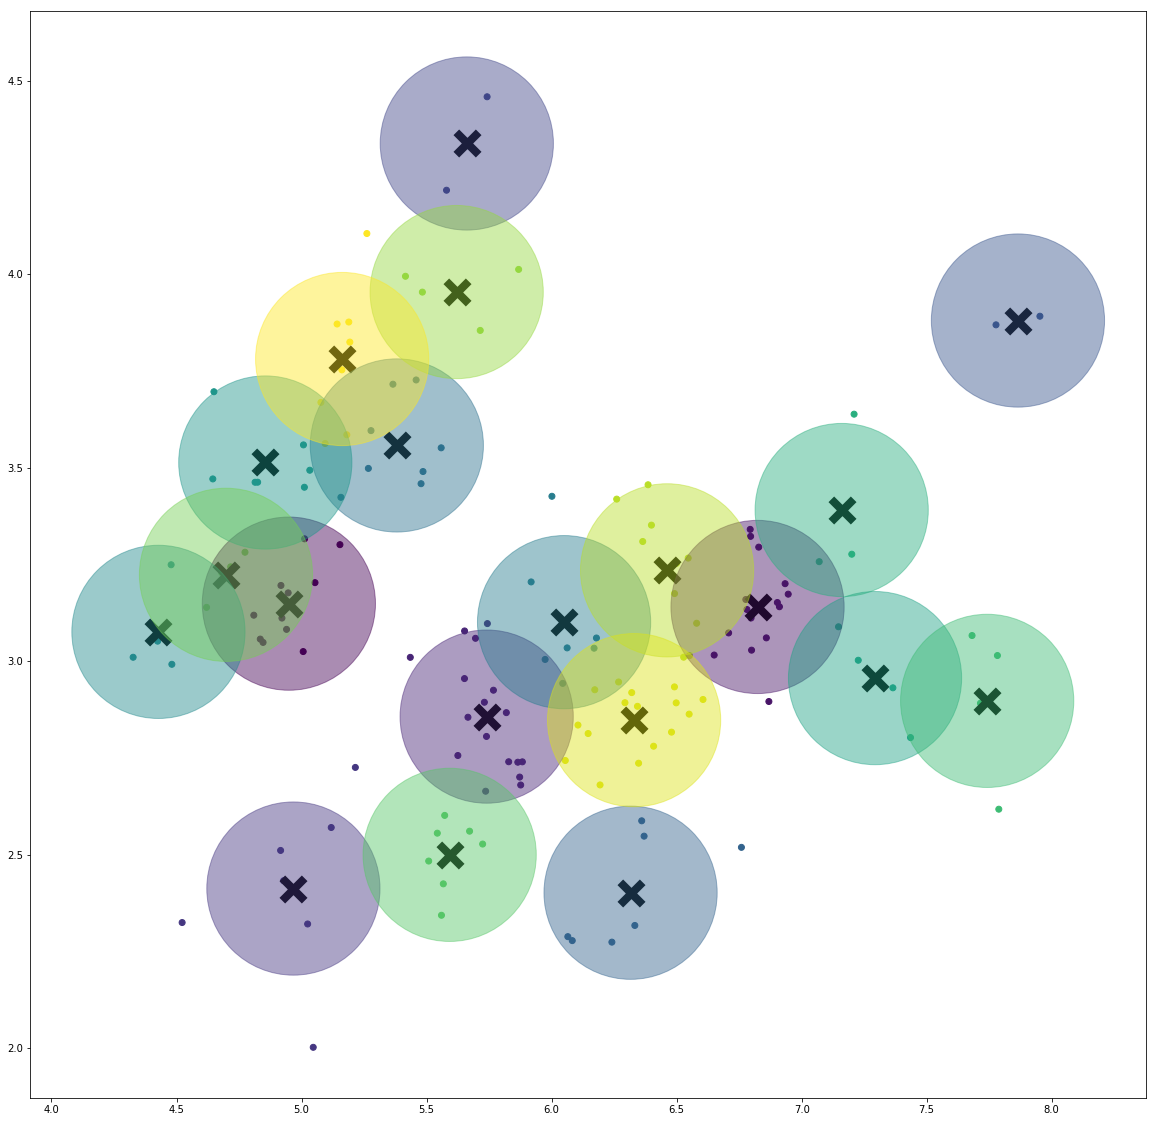

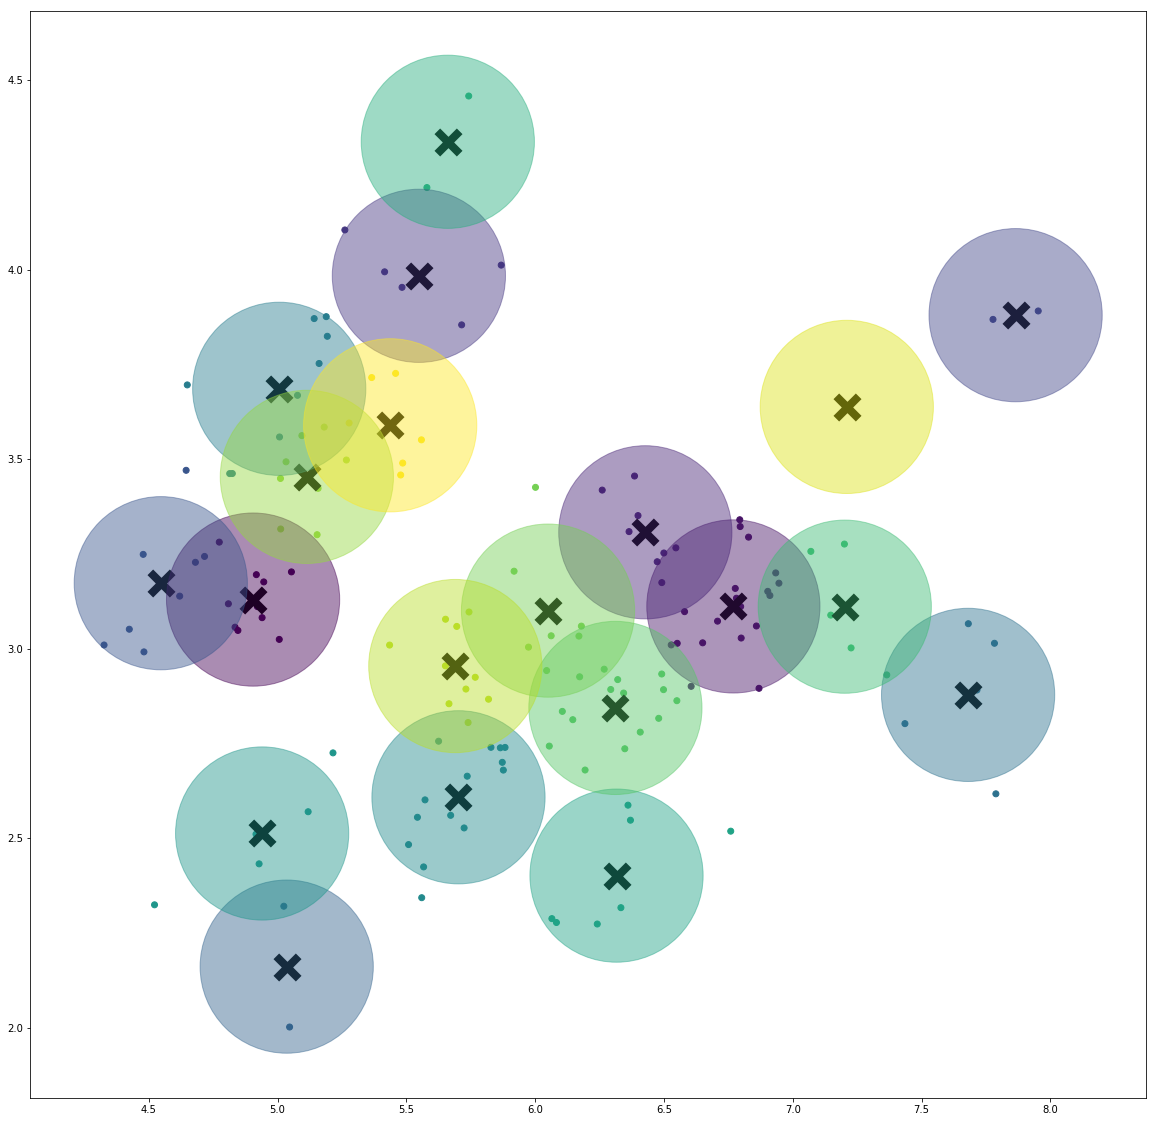

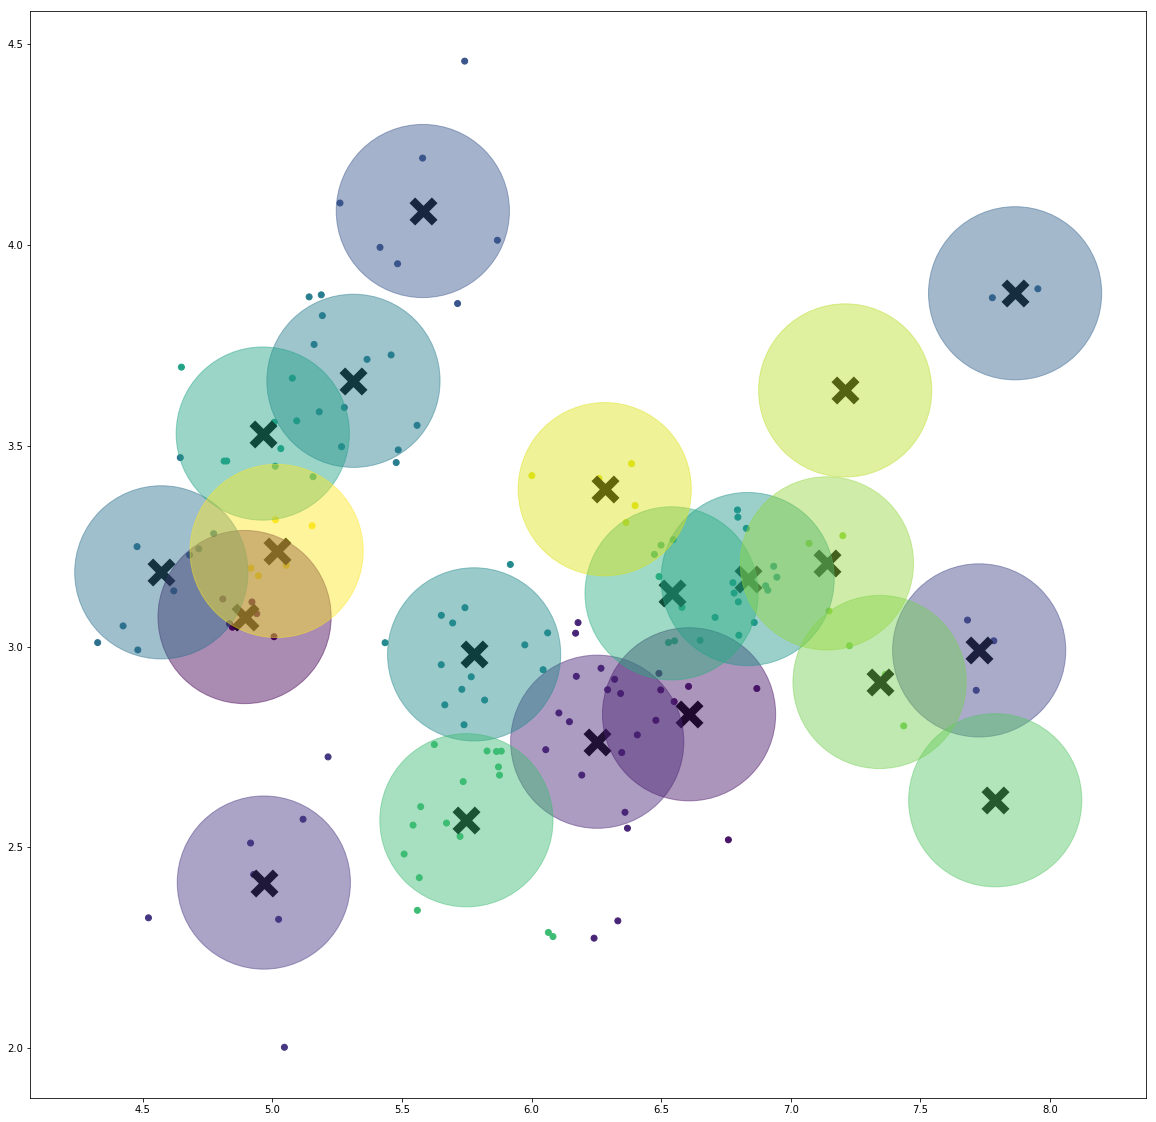

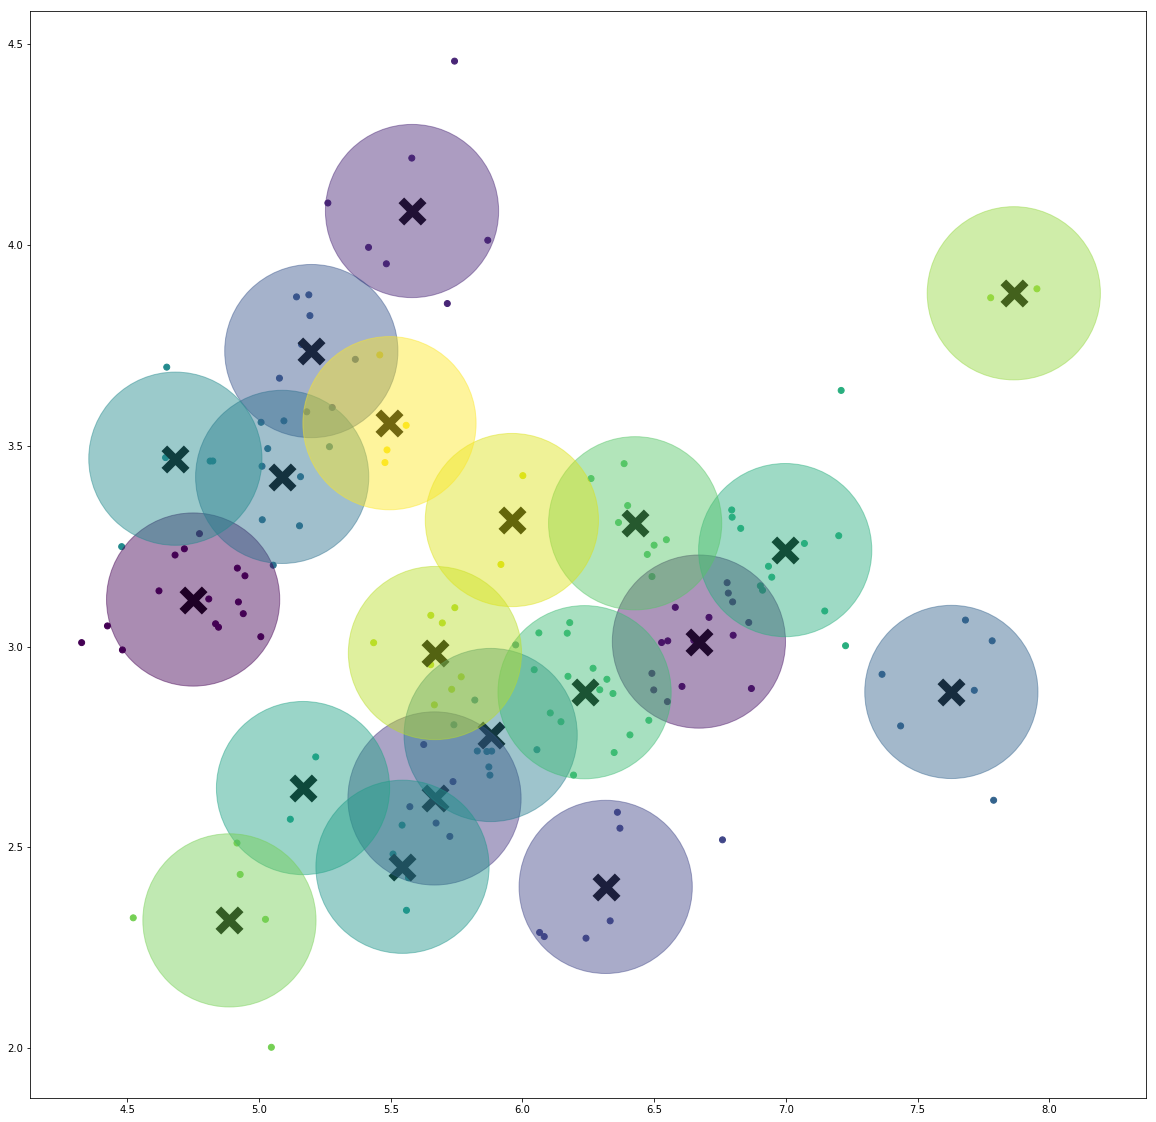

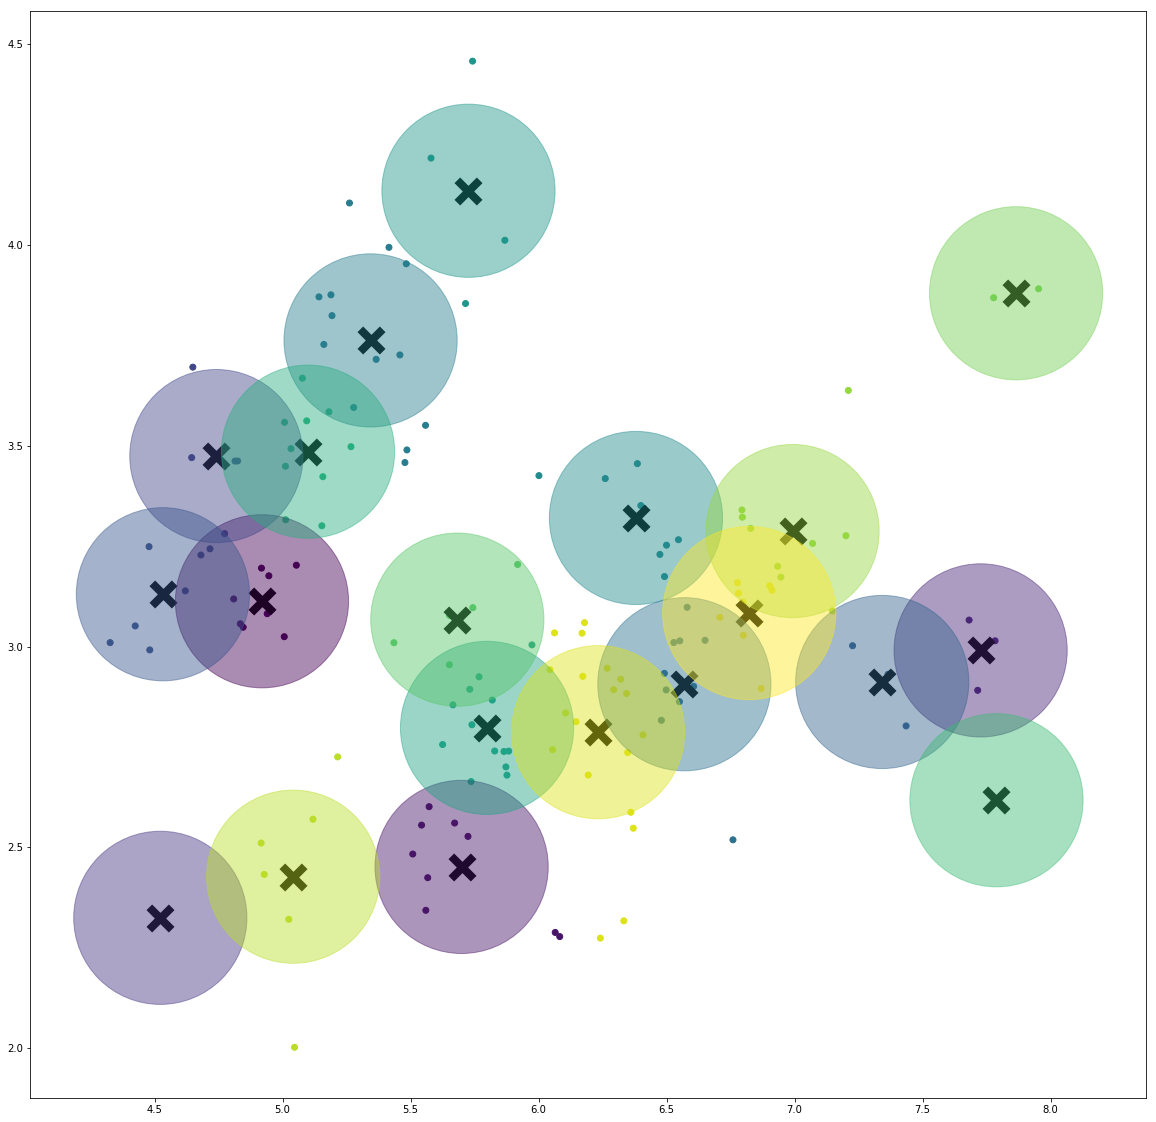

best score: 4.26036770674847


In [25]:
Z, mu, ssd = ml.cluster.kmeans(X, K=20, init='K++')
fig, ax = plt.subplots(1, 1, figsize=(20,20))
ax.scatter(X[:, 0], X[:, 1], c=Z)
ax.scatter(mu[:, 0], mu[:, 1], s=500, marker='x', facecolor='black', lw=8) 
ax.scatter(mu[:, 0], mu[:, 1], s=30000, alpha=.45, c=np.unique(Z))
plt.show()
best_score = ssd
for i in range(5):
    Z, mu, ssd = ml.cluster.kmeans(X, K=20, init='K++')
    fig, ax = plt.subplots(1, 1, figsize=(20,20))
    ax.scatter(X[:, 0], X[:, 1], c=Z)
    ax.scatter(mu[:, 0], mu[:, 1], s=500, marker='x', facecolor='black', lw=8) 
    ax.scatter(mu[:, 0], mu[:, 1], s=30000, alpha=.45, c=np.unique(Z))
    plt.show()
    if(ssd < best_score):
        best_score = ssd

print "best score:", best_score

Problem 1.3

k =  2


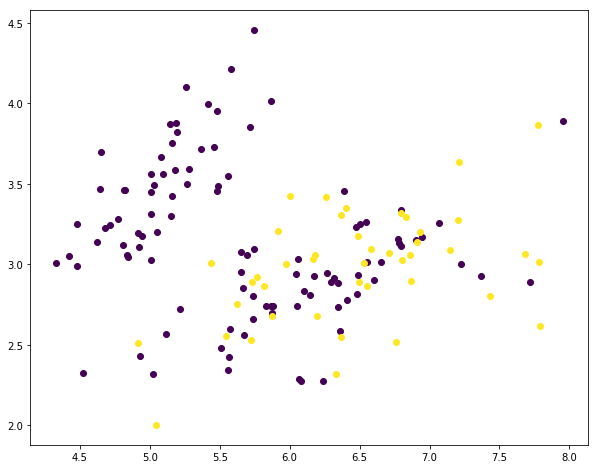

k =  5


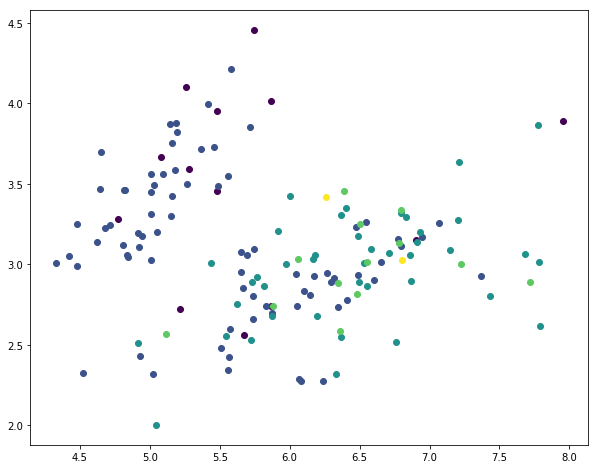

k =  20


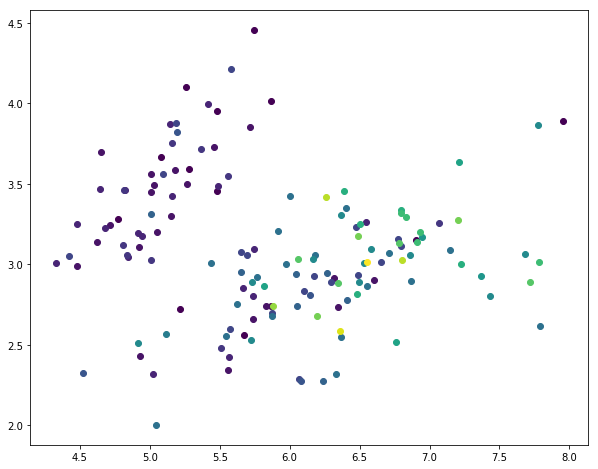

In [26]:
K = [2,5,20]
for k in (K):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    y = linkage(X,'single')
    z = ml.cluster.agglomerative(y,k)
    ml.plotClassify2D(None, X[1:], z[0])
    print "k = ", k
    plt.show()

k = 2


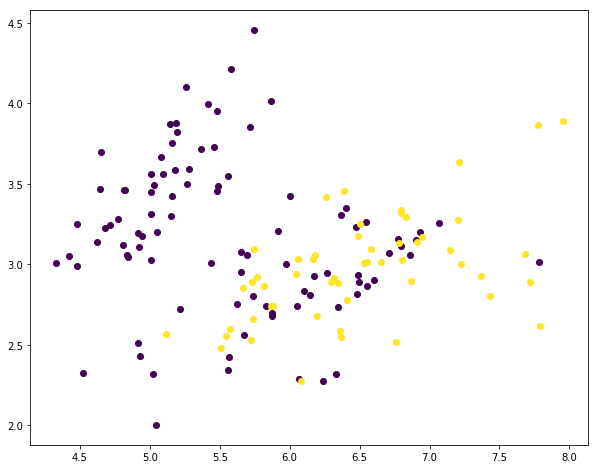

k = 5


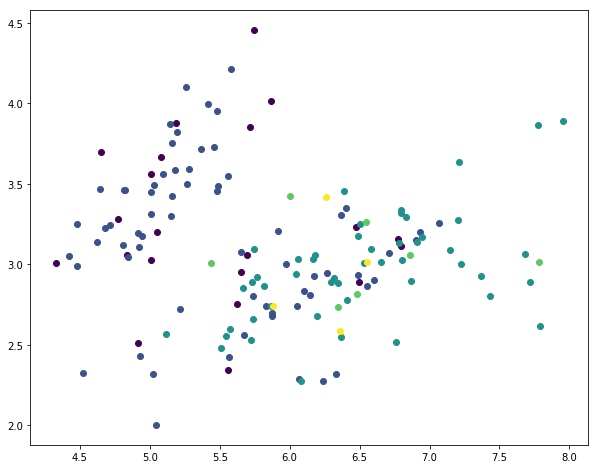

k = 20


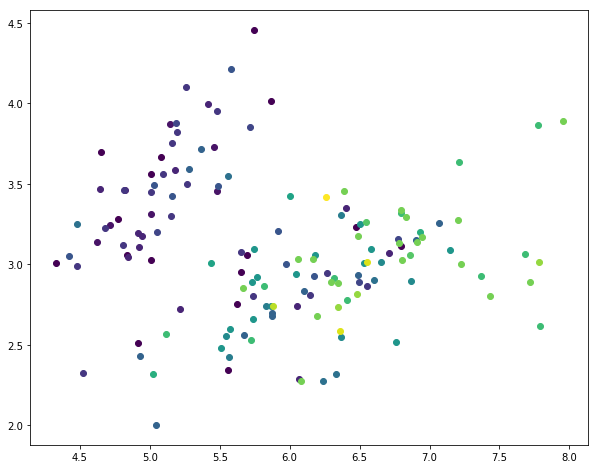

In [27]:
K = [2,5,20]
for k in (K):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    y = linkage(X,'complete')
    z = ml.cluster.agglomerative(y,k)
    ml.plotClassify2D(None, X[1:], z[0])
    print "k =", k
    plt.show()

problem 1.4

K means produces k clusters so in the graphs produced by the K-means algorithm k many centers are created and placed to cluster the data. There are a few over laps between clusters and the data points are mostly clustered with other data points around it. In the agglomerative clustering, data in the same cluster overlap a lot more than in K-means and data points far apart can be in the same cluster. Additionally, in k-means, there are k clusters, but in agglomerative, there are not 20 clusters when k = 20.

problem 2.1

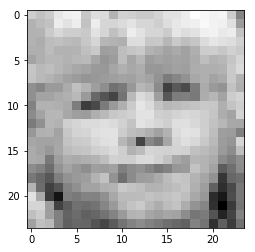

In [35]:
X = np.genfromtxt("data/faces.txt", delimiter=None) 
mu = np.mean(X);
X0 = X - mu;
image = np.reshape(X0[int(mu),:],(24,24))
plt.imshow( image.T , cmap="gray") 

problem 2.2

In [36]:
[U, s, V] = svd(X, full_matrices = False);
W = np.dot(U, np.diag(s))
print 'Shape of W = (%d, %d)' % W.shape, 'Shape of V = (%d, %d)' % V.shape

Shape of W = (4916, 576) Shape of V = (576, 576)


problem 2.3

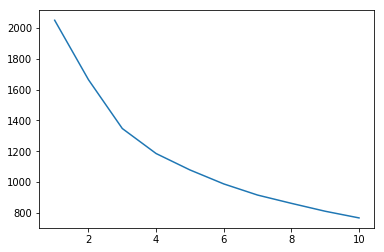

In [39]:
mse = []
for k in range(1,11):
    Xhat0 = np.dot(W[:,:k],V[:k,:]);
    mse.append(np.mean( (X - Xhat0)**2));
    
plt.plot(K, mse);
plt.show()

problem 2.4

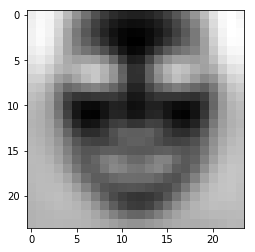

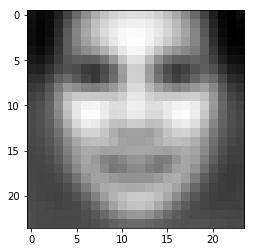

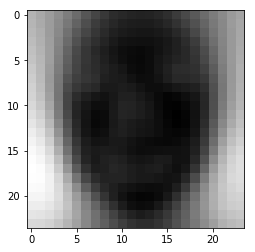

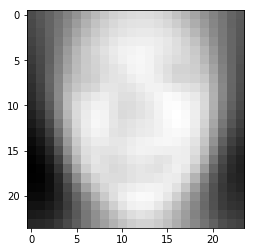

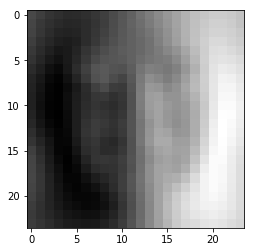

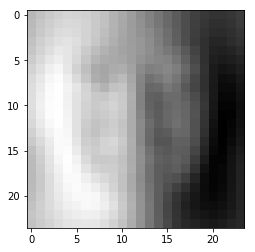

In [42]:
for j in range(0, 3):
    a = 2 * np.median(np.abs(W[:,j]));
    image1 = np.reshape(mu + a*V[j,:], (24,24));
    image2 = np.reshape(mu - a*V[j,:], (24,24));
    plt.imshow(image1.T, cmap="gray");
    plt.show();
    plt.imshow(image2.T, cmap="gray");
    plt.show();

problem 2.5

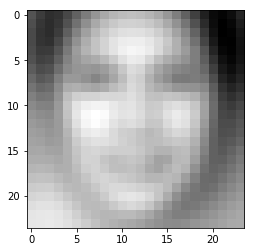

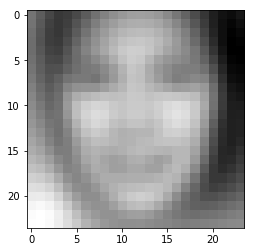

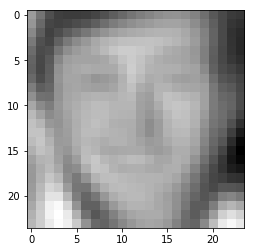

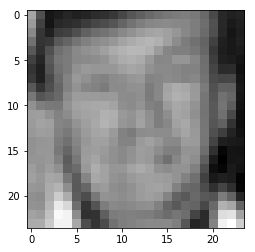

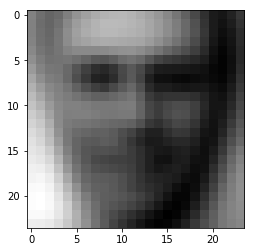

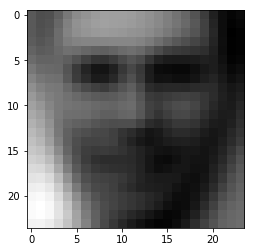

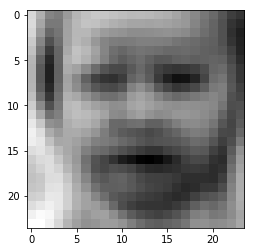

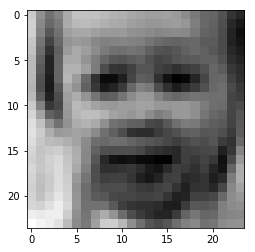

In [46]:
K = [5,10,50,100];
for i in range(37, 39):
    for j in K:
        image = mu + np.dot(W[:,:j], V[:j,:]);
        image = np.reshape(image[i,:], (24,24));
        plt.imshow(image.T,cmap="gray");
        plt.show();

problem 2.6

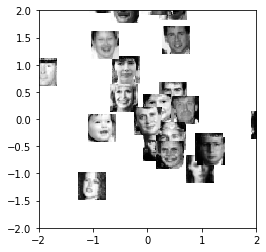

In [50]:
coord,params = ml.transforms.rescale( W[:,0:2] ) 
plt.figure();
for i in range(26,52):
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) )
    plt.imshow( img.T , cmap="gray", extent=loc )
    plt.axis( (-2,2,-2,2) )
plt.show();

Statement of Collaboration:
For this assigment, I did not collaborate with anyone.